# Last fm recommendation based on the artist name

The dataset is considered from https://grouplens.org/datasets/hetrec-2011/

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import our files
plays = pd.read_csv('lastfm-2011/user_artists.dat',sep='\t')
artists = pd.read_csv('lastfm-2011/artists.dat',sep='\t',usecols=['id','name'])


In [3]:
plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [4]:
artists.head()

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [5]:
# merging the artists and plays datasets
fm  = pd.merge(artists, plays, how = 'inner',left_on='id',
                right_on='artistID')
fm.head()

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152


### creating a column listen count

In [6]:
# creating a new column listen count which says how many times the song was listened base on artist name
from collections import Counter
count1 = fm['name']
count2=Counter(count1)

In [7]:
count2.items()

dict_items([('MALICE MIZER', 3), ('Diary of Dreams', 12), ('Carpathian Forest', 3), ('Moi dix Mois', 2), ('Bella Morte', 2), ('Moonspell', 10), ('Marilyn Manson', 133), ('DIR EN GREY', 12), ('Combichrist', 24), ('Grendel', 9), ('Agonoize', 6), ('Behemoth', 19), ('Hocico', 10), ('Dimmu Borgir', 26), ('London After Midnight', 8), ('Psyclon Nine', 6), ('The Crüxshadows', 10), (':wumpscut:', 13), ('Limbonic Art', 1), ('Artista sconosciuto', 1), ('xotox', 1), ('The Kovenant', 4), ('Feindflug', 4), ('Cradle of Filth', 26), ('Tamtrum', 2), ('Laibach', 6), ('Gorgoroth', 6), ('And One', 32), ('Amduscia', 4), ('Covenant', 16), ('Icon of Coil', 9), ('KMFDM', 14), ('Funker Vogt', 5), ('Dawn of Ashes', 5), ('Sopor Aeternus & The Ensemble of Shadows', 11), ('The Faint', 14), ('God Module', 7), ('Noisuf-X', 3), ('Das Ich', 1), ('Mindless Self Indulgence', 39), ('Pyotr Ilyich Tchaikovsky', 5), ('Emperor', 6), ('Anorexia Nervosa', 3), ('Reaper', 6), ('Gothminister', 3), ('Duran Duran', 111), ('Morcheeb

In [8]:
list_count = fm['name'].map(count2)

In [9]:
list_count

0         3
1         3
2         3
3        12
4        12
         ..
92829     1
92830     1
92831     1
92832     1
92833     1
Name: name, Length: 92834, dtype: int64

In [10]:
fm['listen_count'] = list_count

In [11]:
fm.head()

,id,name,userID,artistID,weight,listen_count
0,1,MALICE MIZER,34,1,212,3
1,1,MALICE MIZER,274,1,483,3
2,1,MALICE MIZER,785,1,76,3
3,2,Diary of Dreams,135,2,1021,12
4,2,Diary of Dreams,257,2,152,12


In [12]:
fm.shape

(92834, 6)

In [13]:
fm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92834 entries, 0 to 92833
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            92834 non-null  int64 
 1   name          92834 non-null  object
 2   userID        92834 non-null  int64 
 3   artistID      92834 non-null  int64 
 4   weight        92834 non-null  int64 
 5   listen_count  92834 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 5.0+ MB


In [14]:
fm.describe()

,id,userID,artistID,weight,listen_count
count,92834.000000,92834.000000,92834.000000,92834.00000,92834.000000
mean,3331.123145,1037.010481,3331.123145,745.24393,86.018420
std,4383.590502,610.870436,4383.590502,3751.32208,123.189644
min,1.000000,2.000000,1.000000,1.00000,1.000000
25%,436.000000,502.000000,436.000000,107.00000,5.000000
50%,1246.000000,1029.000000,1246.000000,260.00000,31.000000
75%,4350.000000,1568.000000,4350.000000,614.00000,111.000000
max,18745.000000,2100.000000,18745.000000,352698.00000,611.000000


In [15]:
fm.drop(columns = 'id', inplace = True)

### finding all unique items

In [16]:
# unique users
unique_users = fm['userID'].unique()

In [17]:
print(f"These are the {unique_users} unique users in the dataset")

These are the [  34  274  785 ... 1758 1893 2085] unique users in the dataset


In [18]:
sum_unique_users = fm['userID'].unique().shape[0]

In [19]:
print(f"Total of {sum_unique_users} unique users are present in the dataset")

Total of 1892 unique users are present in the dataset


In [20]:
# unique artists
unique_artists = fm['artistID'].unique()

In [21]:
print(f"These are the {unique_artists} unique artists in the dataset")

These are the [    1     2     3 ... 18743 18744 18745] unique artists in the dataset


In [22]:
sum_unique_artists = fm['artistID'].unique().shape[0]

In [23]:
print(f"Total of {sum_unique_artists} unique users are present in the dataset")

Total of 17632 unique users are present in the dataset


In [24]:
# unique artists names
unique_names = fm['name'].unique()

In [25]:
print(f"These are the {unique_names} unique artists in the dataset")

These are the ['MALICE MIZER' 'Diary of Dreams' 'Carpathian Forest' ... 'Coptic Rain'
 'Oz Alchemist' 'Grzegorz Tomczak'] unique artists in the dataset


In [26]:
sum_unique_names = fm['name'].unique().shape[0]

In [27]:
print(f"Total of {sum_unique_names} unique users are present in the dataset")

Total of 17632 unique users are present in the dataset


# Popular artists

In [28]:
# we show only the ten more popular artist names 
rank = fm.groupby('name').agg({'listen_count':'count'}).reset_index()
sum_users = rank['listen_count'].sum()
rank['percent'] = rank['listen_count'].div(sum_users)*100
rank = rank.sort_values(['listen_count','name'],ascending = [0,1])

In [29]:
rank.head()

,name,listen_count,percent
8352,Lady Gaga,611,0.658164
2336,Britney Spears,522,0.562294
12072,Rihanna,484,0.521361
14109,The Beatles,480,0.517052
7913,Katy Perry,473,0.509512


In [30]:
popular_ten_artists_names = rank[:10]
popular_ten_artists_names

,name,listen_count,percent
8352,Lady Gaga,611,0.658164
2336,Britney Spears,522,0.562294
12072,Rihanna,484,0.521361
14109,The Beatles,480,0.517052
7913,Katy Perry,473,0.509512
9130,Madonna,429,0.462115
1411,Avril Lavigne,417,0.449189
3023,Christina Aguilera,407,0.438417
10158,Muse,400,0.430877
11069,Paramore,399,0.429799


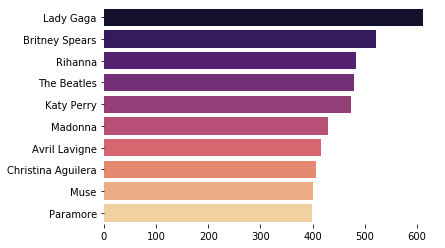

In [31]:
# plotting for popular artists
import matplotlib.pyplot as plt
import seaborn as sns

labels = popular_ten_artists_names['name'].tolist()
counts = popular_ten_artists_names['listen_count'].tolist()
plt.figure()
sns.barplot(x=counts, y=labels, palette='magma')
sns.despine(left=True, bottom=True)

In [32]:
listen_counts = pd.DataFrame(fm.groupby('listen_count').size(), columns=['count'])

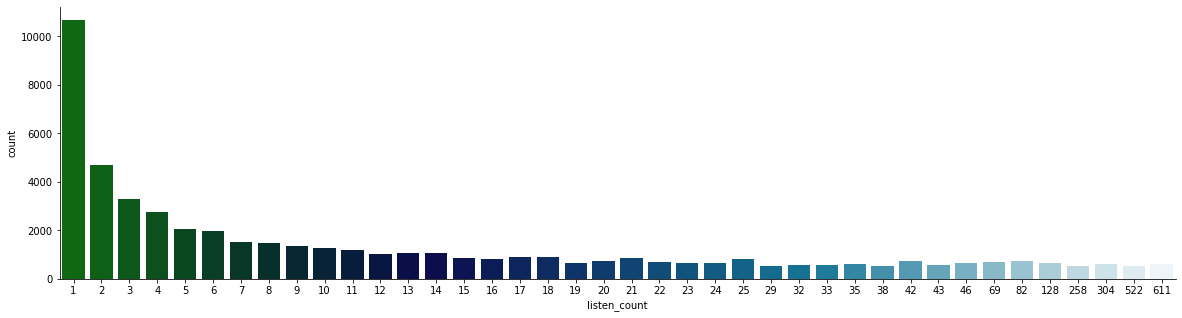

In [33]:
# plotting based on the counts of artis
listen_counts_temp = listen_counts[listen_counts['count'] > 500].reset_index(drop=False)
plt.figure(figsize=(20, 5))
sns.barplot(x='listen_count', y='count', palette='ocean', data=listen_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [34]:
# Get how many values should it be if all songs have been listen by all users
values_matrix =sum_unique_users * sum_unique_names

In [35]:
# Substract the total values with the actual shape of the DataFrame songs
zero_values_matrix = values_matrix - fm.shape[0]

In [36]:
print(f"The matrix of users x artists names has {zero_values_matrix} values that are zero")

The matrix of users x artists names has 33266910 values that are zero


In [37]:
from scipy.sparse import csr_matrix

# convert the dataframe into a pivot table
features = fm.pivot(index='artistID', columns='userID', values='listen_count').fillna(0)

# obtain a sparse matrix
matrix_features = csr_matrix(features.values)

In [38]:
features.head()

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
artistID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
fm_unique_artists = fm.drop_duplicates(subset=['artistID']).reset_index(drop=True)[['artistID', 'name']]

In [40]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(fm_unique_artists.set_index('artistID').loc[features.index].name))
}

In [41]:
from rcmndr import Recommender

model = Recommender(metric='cosine', algorithm='auto', k=20, data=matrix_features, decode_id_song=decode_id_song)

C:\Users\SUBHODAYA KUMAR\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [42]:
name = 'Lady Gaga'

In [43]:
new_recommendations = model.make_recommendation(new_song=name, n_recommendations=10)

Starting the recommendation process for Lady Gaga ...
... Done


In [44]:
print(f"The recommendations for {name} are:")
print(f"{new_recommendations}")

The recommendations for Lady Gaga are:
['Avril Lavigne', 'Shakira', 'Black Eyed Peas', 'Madonna', 'Ke$ha', 'Beyoncé', 'Christina Aguilera', 'Katy Perry', 'Rihanna', 'Britney Spears']


In [45]:
name = 'Britney Spears'

In [46]:
new_recommendations = model.make_recommendation(new_song=name, n_recommendations=10)

Starting the recommendation process for Britney Spears ...
... Done


In [47]:
print(f"The recommendations for {name} are:")
print(f"{new_recommendations}")

The recommendations for Britney Spears are:
['Avril Lavigne', 'Madonna', 'Miley Cyrus', 'Shakira', 'Ke$ha', 'Beyoncé', 'Katy Perry', 'Lady Gaga', 'Christina Aguilera', 'Rihanna']


In [48]:
name = 'Diary of Dreams'

In [49]:
new_recommendations = model.make_recommendation(new_song=name, n_recommendations=10)

Starting the recommendation process for Diary of Dreams ...
... Done


In [50]:
print(f"The recommendations for {name} are:")
print(f"{new_recommendations}")

The recommendations for Diary of Dreams are:
['Lights of Euphoria', "Evil's Toy", 'mind.in.a.box', 'Pride and Fall', 'Combichrist', 'Blutengel', 'Absurd Minds', 'Assemblage 23', 'Beseech', 'Terminal Choice']


Here Recommended the similar artist name based on the another artist name